In [18]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

# Set default Seaborn style
sns.set()

from IPython.display import display, HTML
import pandas as pd
'''This is the +12 -> +13 enchantment requirements and statistics'''
# number of weapons necessary to start a roll
ENHANCE_DICT = {
    "10->11":{"weapon_cost":2,"start_percentage":30,"extra_weapon_success_gain":0,"enhancement_charge_gain":2},
    "11->12":{"weapon_cost":2,"start_percentage":20,"extra_weapon_success_gain":7,"enhancement_charge_gain":4},
    "12->13":{"weapon_cost":3,"start_percentage":15,"extra_weapon_success_gain":5,"enhancement_charge_gain":4},
    "13->14":{"weapon_cost":3,"start_percentage":10,"extra_weapon_success_gain":4,"enhancement_charge_gain":4},
    "14->15":{"weapon_cost":4,"start_percentage":5,"extra_weapon_success_gain":2,"enhancement_charge_gain":5}    
}

MAX_WEAP_DICT = {"10->11":0,"11->12":2,"12->13":3,"13->14":5,"14->15":13}

# Constants
ONYX_COST = 6177
CHAOS_ONYX_COST = 16
CRYSTAL_FRAGMENT_COST = 66

#Fluctuates in game
CRYSTAL_FRAGMENT_MESOS = 1000
ONYX_MESOS = 400
CHAOS_ONYX_MESOS = 37500


In [2]:
entries = []

def upgrade(upgrade_level,num_extra_weapons, starting_enhancement_charges = 0, always_use_stacks = False):
    # Use the proper dict
    current_enchance_dict = ENHANCE_DICT[upgrade_level]    
    num_weaps = current_enchance_dict['weapon_cost'] + num_extra_weapons
    onyx_used = ONYX_COST
    chaos_onyx_used = CHAOS_ONYX_COST
    crystal_fragment_used = CRYSTAL_FRAGMENT_COST        
    enchantment_charges = starting_enhancement_charges
    chance_of_upgrade = current_enchance_dict['start_percentage'] + \
    (current_enchance_dict['extra_weapon_success_gain']*num_extra_weapons)  
    if(chance_of_upgrade > 30): chance_of_upgrade = 30
    attempts = 1;
    roll = random.randint(1, 100)
    enchantment_stacks_used = 0    
    if(always_use_stacks): 
        chance_of_upgrade += enchantment_charges
        enchantment_charges = 0
    # If you have the enough enhancement stacks just skip this and go straight to 
    if(((30 + enchantment_charges) >= 99) & (upgrade_level == "14->15")):
        #Even though it's 99%, I'll take it as 100% (sorry for the people who failed here)
        num_weaps += MAX_WEAP_DICT[upgrade_level] - num_extra_weapons
        pass_or_fail = True
        enchantment_stacks_used = 1
    else:
        pass_or_fail = (roll <= chance_of_upgrade)
    while(pass_or_fail == False):
        attempts += 1
        num_weaps += current_enchance_dict['weapon_cost'] + num_extra_weapons
        onyx_used += ONYX_COST
        chaos_onyx_used += CHAOS_ONYX_COST
        crystal_fragment_used += CRYSTAL_FRAGMENT_COST
        enchantment_charges += current_enchance_dict['enhancement_charge_gain']    
        roll = random.randint(1, 100)
        if(((30 + enchantment_charges) >= 99) & (upgrade_level == "14->15")):
            # Add the max weaps to get to 13
            num_weaps += MAX_WEAP_DICT[upgrade_level] - num_extra_weapons
            pass_or_fail = True
            enchantment_stacks_used = 1
        else:
            if(always_use_stacks): 
                chance_of_upgrade = current_enchance_dict['start_percentage'] + \
        (current_enchance_dict['extra_weapon_success_gain']*num_extra_weapons) + enchantment_charges
                enchantment_charges = 0
            pass_or_fail = (roll <= chance_of_upgrade)

    entries.append({"Weapons" :num_weaps,"Onyx":onyx_used,"Chaos_Onyx":chaos_onyx_used,
                    "Crystal_Framgent":crystal_fragment_used,"Enhancement_Charges":enchantment_charges,
                    "Attempts":attempts,"Extra_Weapons":num_extra_weapons,
                    "Mesos":((crystal_fragment_used*CRYSTAL_FRAGMENT_MESOS) + (onyx_used*ONYX_MESOS) + (chaos_onyx_used*CHAOS_ONYX_MESOS)),
                    "Upgrade":upgrade_level, "Enchantment_Stacks_Used":enchantment_stacks_used,
                    "Starting_Enhancement_Charges":starting_enhancement_charges})        
    

In [3]:
# Generate the sample data
entries.clear()
# loop for each possible charges but don't use the list 
_ = [[[upgrade(key,i) for i in range(MAX_WEAP_DICT[key] + 1)] for _ in range(100000)] for key in ENHANCE_DICT.keys() if key != "14->15"]

df = pd.DataFrame(entries)

In [4]:
# Some simple analysis
analysis_df = df.groupby(['Upgrade','Extra_Weapons']).agg('mean')
analysis_df['Mesos_(million)'] = round(analysis_df.Mesos/1000000,2)
analysis_df = analysis_df.drop('Mesos',axis=1)
analysis_df = analysis_df.drop('Starting_Enhancement_Charges',axis=1)
# Find the cost of an enchancement charge
analysis_df['Enhancement_Charges/Mesos (million)'] = analysis_df.Enhancement_Charges / analysis_df['Mesos_(million)']
display(analysis_df)

Attempts  Chaos_Onyx  Crystal_Framgent  \
Upgrade Extra_Weapons                                           
10->11  0               3.33679    53.38864         220.22814   
11->12  0               4.98372    79.73952         328.92552   
        1               3.71001    59.36016         244.86066   
        2               3.33684    53.38944         220.23144   
12->13  0               6.64273   106.28368         438.42018   
        1               5.00997    80.15952         330.65802   
        2               4.00286    64.04576         264.18876   
        3               3.32771    53.24336         219.62886   
13->14  0              10.01090   160.17440         660.71940   
        1               7.13624   114.17984         470.99184   
        2               5.58221    89.31536         368.42586   
        3               4.53907    72.62512         299.57862   
        4               3.86738    61.87808         255.24708   
        5               3.33113    53.29808         219.85458   

                       Enchantment_Stacks_Used  Enhancement_Charges  \
Upgrade Extra_Weapons                                                 
10->11  0                                  0.0              4.67358   
11->12  0                                  0.0             15.93488   
        1                                  0.0             10.84004   
        2                                  0.0              9.34736   
12->13  0                                  0.0             22.57092   
        1                                  0.0             16.03988   
        2                                  0.0             12.01144   
        3                                  0.0              9.31084   
13->14  0                                  0.0             36.04360   
        1                                  0.0             24.54496   
        2                                  0.0             18.32884   
        3                                  0.0             14.15628   
        4                                  0.0             11.46952   
        5                                  0.0              9.32452   

                              Onyx   Weapons  Mesos_(million)  \
Upgrade Extra_Weapons                                           
10->11  0              20611.35183   6.67358            10.47   
11->12  0              30784.43844   9.96744            15.63   
        1              22916.73177  11.13003            11.64   
        2              20611.66068  13.34736            10.47   
12->13  0              41032.14321  19.92819            20.84   
        1              30946.58469  20.03988            15.72   
        2              24725.66622  20.01430            12.56   
        3              20555.26467  19.96626            10.44   
13->14  0              61837.32930  30.03270            31.40   
        1              44080.55448  28.54496            22.38   
        2              34481.31117  27.91105            17.51   
        3              28037.83539  27.23442            14.24   
        4              23888.80626  27.07166            12.13   
        5              20576.39001  26.64904            10.45   

                       Enhancement_Charges/Mesos (million)  
Upgrade Extra_Weapons                                       
10->11  0                                         0.446378  
11->12  0                                         1.019506  
        1                                         0.931275  
        2                                         0.892776  
12->13  0                                         1.083058  
        1                                         1.020349  
        2                                         0.956325  
        3                                         0.891843  
13->14  0                                         1.147885  
        1                                         1.096736  
        2                                         1.046764  
        3  

In [5]:
# If saving money is your goal, seems clear that you should use the most amount of weapons
analysis_df.loc[analysis_df[['Mesos_(million)']].groupby(level=0)['Mesos_(million)'].idxmin()]

,,Attempts,Chaos_Onyx,Crystal_Framgent,Enchantment_Stacks_Used,Enhancement_Charges,Onyx,Weapons,Mesos_(million),Enhancement_Charges/Mesos (million)
Upgrade,Extra_Weapons,,,,,,,,,
10->11,0,3.33679,53.38864,220.22814,0.0,4.67358,20611.35183,6.67358,10.47,0.446378
11->12,2,3.33684,53.38944,220.23144,0.0,9.34736,20611.66068,13.34736,10.47,0.892776
12->13,3,3.32771,53.24336,219.62886,0.0,9.31084,20555.26467,19.96626,10.44,0.891843
13->14,5,3.33113,53.29808,219.85458,0.0,9.32452,20576.39001,26.64904,10.45,0.892299


In [6]:
# If saving weapons is your goal
analysis_df.loc[analysis_df[['Weapons']].groupby(level=0)['Weapons'].idxmin()]

,,Attempts,Chaos_Onyx,Crystal_Framgent,Enchantment_Stacks_Used,Enhancement_Charges,Onyx,Weapons,Mesos_(million),Enhancement_Charges/Mesos (million)
Upgrade,Extra_Weapons,,,,,,,,,
10->11,0,3.33679,53.38864,220.22814,0.0,4.67358,20611.35183,6.67358,10.47,0.446378
11->12,0,4.98372,79.73952,328.92552,0.0,15.93488,30784.43844,9.96744,15.63,1.019506
12->13,0,6.64273,106.28368,438.42018,0.0,22.57092,41032.14321,19.92819,20.84,1.083058
13->14,5,3.33113,53.29808,219.85458,0.0,9.32452,20576.39001,26.64904,10.45,0.892299


In [7]:
# If you're trying to max enhancement charges for the lowest cost possible 
analysis_df.loc[analysis_df[['Enhancement_Charges/Mesos (million)']].groupby(level=0)['Enhancement_Charges/Mesos (million)'].idxmin()]

,,Attempts,Chaos_Onyx,Crystal_Framgent,Enchantment_Stacks_Used,Enhancement_Charges,Onyx,Weapons,Mesos_(million),Enhancement_Charges/Mesos (million)
Upgrade,Extra_Weapons,,,,,,,,,
10->11,0,3.33679,53.38864,220.22814,0.0,4.67358,20611.35183,6.67358,10.47,0.446378
11->12,2,3.33684,53.38944,220.23144,0.0,9.34736,20611.66068,13.34736,10.47,0.892776
12->13,3,3.32771,53.24336,219.62886,0.0,9.31084,20555.26467,19.96626,10.44,0.891843
13->14,5,3.33113,53.29808,219.85458,0.0,9.32452,20576.39001,26.64904,10.45,0.892299


In [8]:
# This is the route to max enchancement charges pre-14
display(analysis_df.loc[analysis_df[['Enhancement_Charges']].groupby(level=0)['Enhancement_Charges'].idxmax()])

mesos_sum = sum(analysis_df.loc[analysis_df[['Enhancement_Charges']].groupby(level=0)['Enhancement_Charges'].idxmax()]['Mesos_(million)'])

charge_sum = sum(analysis_df.loc[analysis_df[['Enhancement_Charges']].groupby(level=0)['Enhancement_Charges'].idxmax()].Enhancement_Charges)

print(f"If you have the money ({mesos_sum} Million) to go the no extra weapons path, then you will have over the necessary\
 charges ({round(charge_sum)} vs 69) to upgrade with 99% chance.")

,,Attempts,Chaos_Onyx,Crystal_Framgent,Enchantment_Stacks_Used,Enhancement_Charges,Onyx,Weapons,Mesos_(million),Enhancement_Charges/Mesos (million)
Upgrade,Extra_Weapons,,,,,,,,,
10->11,0,3.33679,53.38864,220.22814,0.0,4.67358,20611.35183,6.67358,10.47,0.446378
11->12,0,4.98372,79.73952,328.92552,0.0,15.93488,30784.43844,9.96744,15.63,1.019506
12->13,0,6.64273,106.28368,438.42018,0.0,22.57092,41032.14321,19.92819,20.84,1.083058
13->14,0,10.01090,160.17440,660.71940,0.0,36.04360,61837.32930,30.03270,31.40,1.147885


If you have the money (78.34 Million) to go the no extra weapons path, then you will have over the necessary charges (79 vs 69) to upgrade with 99% chance.


In [9]:
entries.clear()
# Surprisingly there is no "best" answer because depending on your situation you will choose a different model.
# Also you can see I purposely left out the 14->15 enchancement phase because that one requires special processing with enchancement stacks
# I will only be simulating 5000 attempts the 14->15 for the possible starting enhancement charges (sec)
# this is because of the simulation time required for that many attempts takes too long
# This will also try to collect up to 69 stacks then use them with the 100% (actually 99%) way of upgrading
_ = [[[upgrade("14->15",i,sec) for i in range(MAX_WEAP_DICT["14->15"] + 1)] for _ in range(5000)] for sec in range(0,70)]
df = pd.DataFrame(entries)

In [10]:
analysis_14to15_df = df.groupby(['Extra_Weapons','Starting_Enhancement_Charges']).agg('mean')
# Get the value in percentage
analysis_14to15_df['Enchantment_Stacks_Used'] = analysis_14to15_df['Enchantment_Stacks_Used'].multiply(100)

analysis_14to15_df['Mesos_(million)'] = round(analysis_14to15_df.Mesos/1000000,2)
analysis_14to15_df = analysis_14to15_df.drop('Mesos',axis=1)

In [11]:
# Table of cheapest way to get to +15 on average
HTML(analysis_14to15_df.loc[analysis_14to15_df[['Mesos_(million)']].groupby(level=1)['Mesos_(million)'].idxmin()][["Attempts","Mesos_(million)","Weapons","Enchantment_Stacks_Used"]].to_html())

# The conclusion to be drawn from this table is that in almost all scenarios, you will be better off using all of your enchantment stacks 
# and 17 weapons to upgrade every time as you will reach +15 before you will use enchantment stacks. 
# This is if you are looking for the cheapest possible way to get to +15

In [12]:
entries.clear()
# Surprisingly there is no "best" answer because depending on your situation you will choose a different model.
# Also you can see I purposely left out the 14->15 enchancement phase because that one requires special processing with enchancement stacks
# I will only be simulating 5000 attempts the 14->15 for the possible starting enhancement charges (sec)
# this is because of the simulation time required for that many attempts takes too long
# This will also try to collect up to 69 stacks then use them with the 100% (actually 99%) way of upgrading
_ = [[[upgrade("14->15",i,sec,True) for i in range(MAX_WEAP_DICT["14->15"] + 1)] for _ in range(5000)] for sec in range(0,70)]
df = pd.DataFrame(entries)

In [13]:
analysis_14to15_df = df.groupby(['Extra_Weapons','Starting_Enhancement_Charges']).agg('mean')
# Get the value in percentage
analysis_14to15_df['Enchantment_Stacks_Used'] = analysis_14to15_df['Enchantment_Stacks_Used'].multiply(100)

analysis_14to15_df['Mesos_(million)'] = round(analysis_14to15_df.Mesos/1000000,2)
analysis_14to15_df = analysis_14to15_df.drop('Mesos',axis=1)

<IPython.core.display.Javascript object>


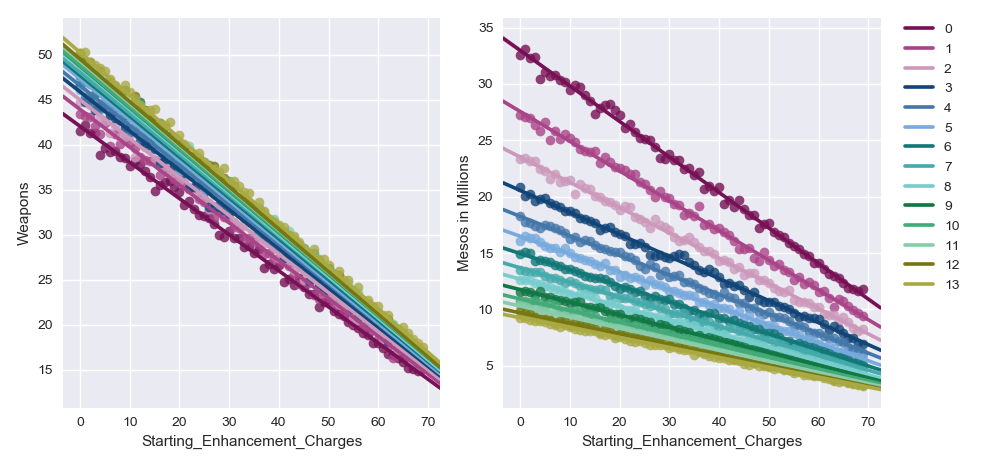

In [23]:
# This will fix labelling issues
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True}) 

# This will show the numbers of weapons necessary to upgrade to +15 
# if you fully commit on each upgrade by constantly using all enhancement charges
flatui =  ["#771155", "#AA4488", "#CC99BB", "#114477", "#4477AA", 
           "#77AADD", "#117777", "#44AAAA", "#77CCCC", "#117744", 
           "#44AA77", "#88CCAA", "#777711", "#AAAA44", "#DDDD77", 
           "#774411", "#AA7744", "#DDAA77", "#771122", "#AA4455", "#DD7788"]
new_df = analysis_14to15_df.reset_index()
fig, (ax1,ax2) = plt.subplots(ncols=2)
for i in range(14):
    sns.regplot(x="Starting_Enhancement_Charges", y="Weapons", 
               data= new_df[new_df.Extra_Weapons == i],color=flatui[i],ax=ax1)
    sns.regplot(x="Starting_Enhancement_Charges", y="Mesos_(million)", 
               data= new_df[new_df.Extra_Weapons == i],color=flatui[i],ax=ax2)
    
plt.legend(range(14),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Mesos in Millions')
plt.show()